**import**

In [14]:
from path_finder import GreedySearch
from path_finder import BFS
from path_finder import DFS
from path_finder import AStarSearch
from graph_generator import read_input_file
from matplotlib import pyplot as plt
import time
from IPython.display import display

%matplotlib notebook

**test function**

In [15]:
import timeit
def test(algorithm, start, goal, matrix, is_print=True):
    path_finder = algorithm(start, goal)
    
    start_tick = timeit.default_timer()
    path = path_finder.search(matrix)
    end_tick = timeit.default_timer()
    
    fig = plt.figure()
    fig.canvas.draw()
    PATH_VALUE = 9
    
    if path:
        print("Found path")
        for pos in path:
            matrix[pos] = PATH_VALUE
    else:
        print("Not found path")
    
    if is_print:
        print(f'distance: {len(path)}, time: {end_tick - start_tick}')
        matrix[start] = PATH_VALUE + 2
        matrix[goal] = PATH_VALUE + 2
        fig.canvas.draw()
        plt.imshow(matrix, cmap="tab20c")
        plt.show()

**main**

BFS


<IPython.core.display.Javascript object>


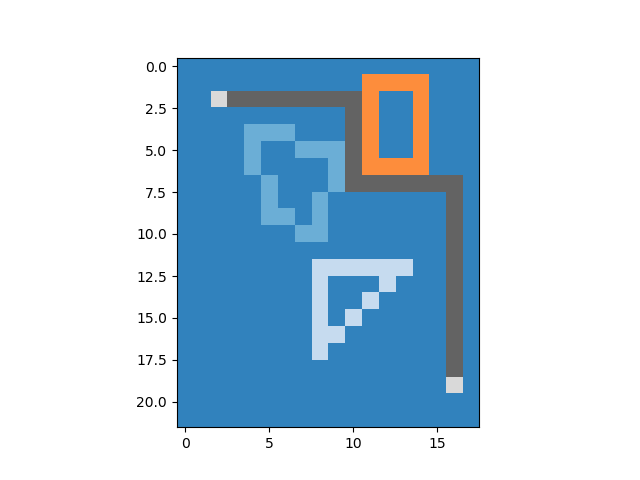

Found path
distance: 32, time: 0.04680153101506335
DFS


<IPython.core.display.Javascript object>


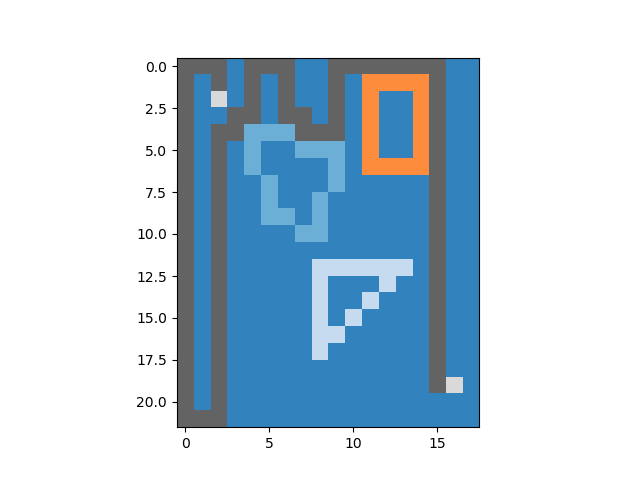

Found path
distance: 90, time: 0.0406439415821751
A


<IPython.core.display.Javascript object>


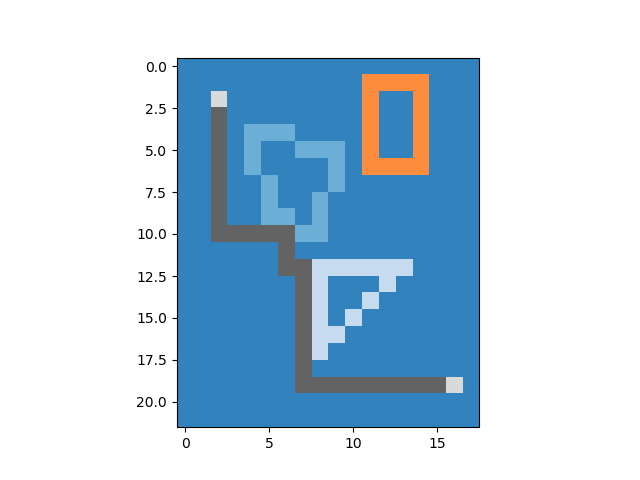

Found path
distance: 32, time: 0.01857584788623967
A*


<IPython.core.display.Javascript object>


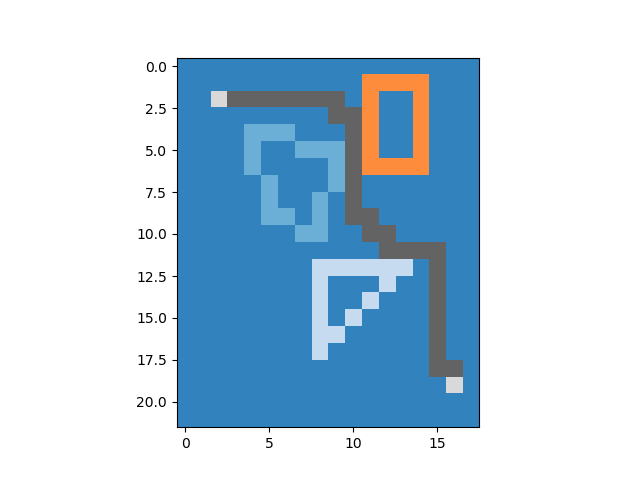

Found path
distance: 32, time: 0.02501246960946446


In [16]:
# from path_finder import BFS
# from graph_generator import read_input_file

def read_input_and_test(algorithm):
    input_path = 'sample_input.txt'
    matrix, start, goal = read_input_file(input_path)
    if algorithm != None:
        test(algorithm, start, goal, matrix)

if __name__ == '__main__':
#     input_path = 'sample_input.txt'
#     matrix, start, goal = read_input_file(input_path)
    print('BFS')
    read_input_and_test(BFS)
    print('DFS')
    read_input_and_test(DFS)
    print('A')
    read_input_and_test(GreedySearch)
    print('A*')
    read_input_and_test(AStarSearch)

# level 3:

## Collecting all points before reaching the goal

In [17]:
def pretty(d, indent=0):
   for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

In [18]:
# import heapq
# import numpy as np
# import random
# from path_finder import BasePathFinder
# from path_finder import BFS
# import json

# REACHED_POINT_FLAG = 88

# class AllPointSearch():
#     def __init__(self, start, goal, list_point, use_heapq = True, algo_to_find_shortest_point = BFS, list_move=[(0, 1), (0, -1), (1, 0), (-1, 0)]):
#         '''
#             start: start point
#             goal: goal point
#             list_point: list of points that we have to reach
#             algo_to_find_shortest_point: algorithm to find shortest path between given pair of points
#             list_move: list of actions
#         '''
        
#         self.list_point = list_point
#         self.start = start
#         self.goal = goal
#         self.list_move = list_move
#         self.list_point = list_point
#         self.algo_to_find_shortest_point = algo_to_find_shortest_point
#         self.use_heapq = use_heapq
        
#         ## this att is used for find path between two points:
#         ## path_lookup[start][goal] = ['A', 'B', 'C', ...]
#         self.path_lookup = {}
#         self.visited = np.zeros((len(list_point), len(list_point)))
    


#     # --------------------------------------------------------------------------------
#     # CREATE PATH_LOOKUP DICTIONARY

#     ### helper function 1
#     def _find_shortest_path(self, start_point, end_point, matrix):
#         '''
#             find shortest path between a pair of points

#             input: source, target
#             output: result pattern of the correspondent algorithm used for this task
#         '''
#         shortest_path_finder = self.algo_to_find_shortest_point(start_point, end_point)
#         return shortest_path_finder.search(matrix)
    
#     ### helper function 2
#     def _update_path_lookup(self, head, tail, path):
#         if head not in self.path_lookup:
#             if self.use_heapq:
#                 self.path_lookup[head] = []
#             else:
#                 self.path_lookup[head] = {}
        
#         dist = 1e9
#         if path != False:
#             dist = len(path)
        
#         if self.use_heapq:
#             self.path_lookup[head].append((dist, tail, path))
#         else:
#             self.path_lookup[head][tail] = (dist, path)

#     ### main function
#     def _init_path_lookup(self, matrix):
#         '''
#             Initiate lookup dictionary
#             *path_lookup is dictionary:
#                 key: point1
#                 value: list of tupple (distance_between_point1_point2, point1, path_from_point1_to_point2)
            
#         '''

#         matrix[goal] += 1 #mark matrix[goal] != 0: prohibit searching some ways that go through goal point
#         for i, start_point in enumerate(list_point):
#             shortest_path = self._find_shortest_path(self.start, start_point, matrix)
#             self._update_path_lookup(self.start, start_point, shortest_path)
            
#             ## find shortest path between each pair of points
#             for j in range(i+1, len(list_point)):
#                 end_point = list_point[j]
#                 if j == i or self.visited[i, j] == 1 or self.visited[j, i] == 1:
#                     continue
                
#                 shortest_path = self._find_shortest_path(start_point, end_point, matrix)
#                 self._update_path_lookup(start_point, end_point, shortest_path)

#                 reverse_shortest_path = shortest_path.copy()
#                 if shortest_path != False:
#                     reverse_shortest_path.reverse()    
#                 self._update_path_lookup(end_point, start_point, reverse_shortest_path)
                                
#                 self.visited[i, j] = 1
#                 self.visited[j, i] = 1
        
#         matrix[goal] -= 1 
        
#     # ----------------------------------------------------------------------------------
#     # SEARCH ORDER OF POINTS TO REACH
#     def _lookup_path_of_point(self, start_point):
#         '''
#             get information about how to reach to other points of a given point
#             path_lookup data structure is a priority queue
            
#             input: point1
#             output: tupple of closest point compare to point1
#         '''
#         return heapq.heappop(self.path_lookup[start_point])

#     def search(self, matrix):
#         '''
#             start searching: at each point, just choose the closest one

#             output:
#                 final_path: final path from start_point to goal_point. dtype: list of points
#                 reaching_order: ordinal of reached point in list_point. dtype: list of points
#                 total_distance: total distance of final_path. dtype: int
#         '''
#         self._init_path_lookup(matrix)
        
#         final_path = [] # list of points that leads to goal
#         reaching_order = [] # order of points we will reach - dtype: list of points
#         total_distance = 0
        
#         start_point = self.start
#         num_of_list_point = len(list_point)
        
#         while num_of_list_point > 0:
#             distance, next_point, path = self._lookup_path_of_point(start_point)
            
#             if matrix[next_point] != REACHED_POINT_FLAG:
#                 total_distance += distance
#                 final_path += path
#                 reaching_order+= [next_point]
                
#                 matrix[next_point] = REACHED_POINT_FLAG
#                 start_point = next_point
#                 num_of_list_point-=1

        
#         ## find shortest path from the final point to goal
#         shortest_path_to_goal = self._find_shortest_path(reaching_order[-1], goal, matrix)

#         total_distance += len(shortest_path_to_goal)
#         reaching_order.append(goal)
#         final_path.extend(shortest_path_to_goal)
        
#         return final_path, reaching_order, total_distance

In [19]:
from graph_generator import GraphGenerator

def read_multi_point_input(fpath:str, verbose:bool=False, fill:bool=False):
    """ Read input file with TA Format
    Input:
        fpath: Path to input txt file
        verbose: Print to screen to debug
        fill: Should we fill the polygon
    Output:
        graph: (Numpy array) Matrix to represent graph value
        start: (Tuple of int) Start point
        goal: (Tuple of int) Goal point
    """
    f = open(fpath)
    l = f.readline()
    w, h = [int(x) for x in l.strip().split(',')]

    if verbose:
        print("Read from file....")
        print(f"Width={w}, Height={h}")

    generator = GraphGenerator((h, w), fill=fill)
    
    l = f.readline()
    
    #xStart, yStart, xGoal, yGoal = [int(x) for x in l.strip().split(',')]
    list_coor = l.strip().split(',')
    list_x = list_coor[1::2]
    list_y = list_coor[::2]
    list_x = [int(x) for x in list_x]
    list_y = [int(y) for y in list_y]

    xStart, yStart, xGoal, yGoal = list_x[0], list_y[0], list_x[1], list_y[1]
    list_point = [(list_x[i], list_y[i]) for i in range(2, len(list_x))]
    
    
    if verbose:
        print(f"Start: ({xStart}, {yStart})")
        print(f"Goal: ({xGoal}, {yGoal})")

    num_polygon = int(f.readline().strip())

    if verbose:
        print(f"Found {num_polygon} Polygons")
    for pInd in range(num_polygon):
        l = f.readline()
        point_list = [int(x) for x in l.strip().split(',')]
        polygon = list(zip(point_list[::2], point_list[1::2]))

        generator.add_polygon(polygon)

    f.close()

    if verbose:
        print("Done load input")
        generator.plot_graph()

    return generator.generate_graph(), (xStart, yStart), (xGoal, yGoal), list_point


## main - all points search

In [20]:
file_path = "multi_points.txt"
#file_path = "sample_input.txt"
matrix, start, goal, list_point = read_multi_point_input(file_path)
#matrix, start, goal = read_input_file(file_path)

In [21]:
print(list_point)
print(start)
print(goal)

[(5, 1), (2, 8), (9, 8), (19, 3), (2, 20)]
(1, 1)
(19, 20)


**Use_heapq = True**

In [22]:
from path_finder import AllPointSearch
all_point_finder = AllPointSearch(start, goal, list_point, use_heapq=True, algo_to_find_shortest_point=AStarSearch)

In [23]:
final_path, reaching_order, total_distance = all_point_finder.search_always_choose_nearest_point(matrix)


Found path


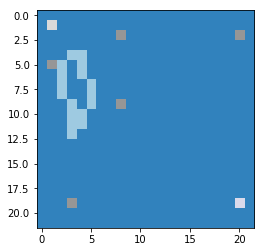

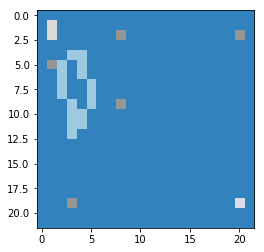

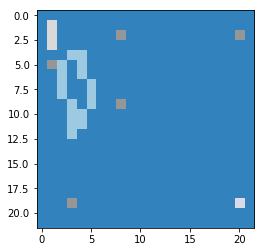

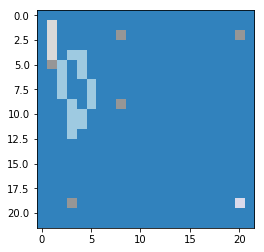

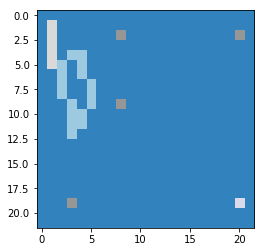

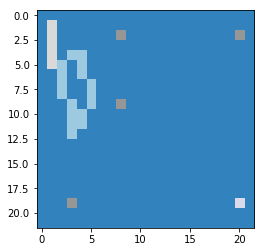

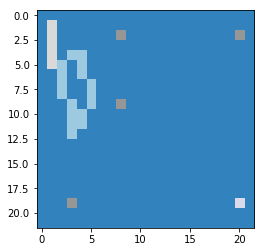

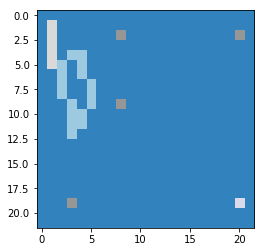

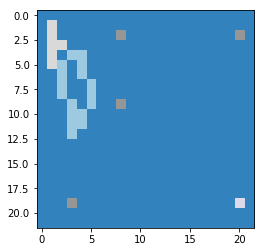

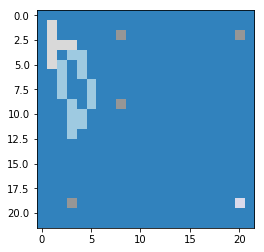

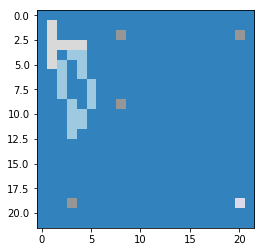

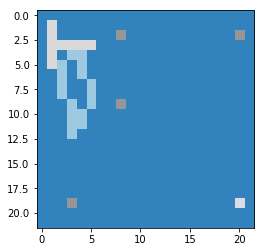

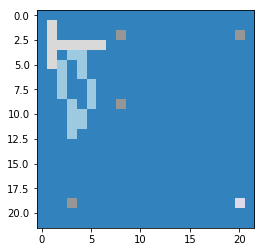

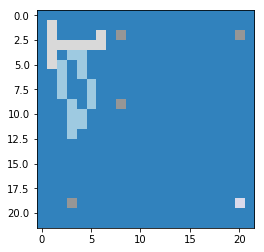

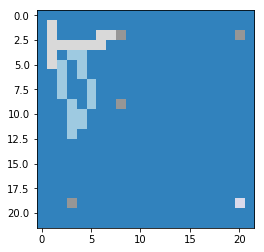

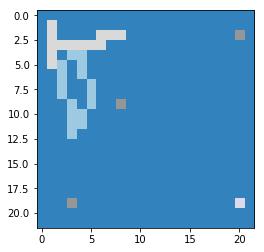

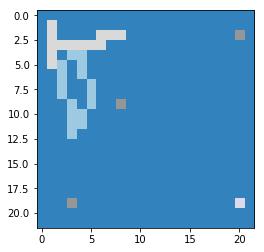

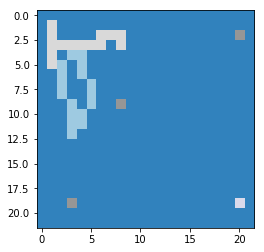

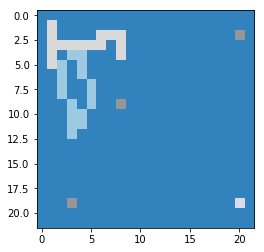

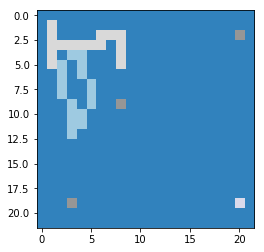

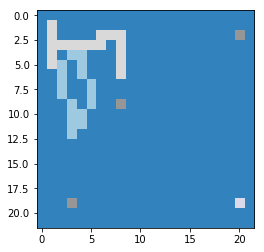

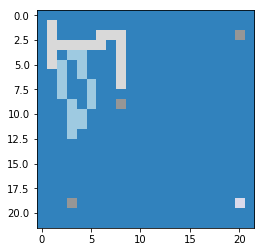

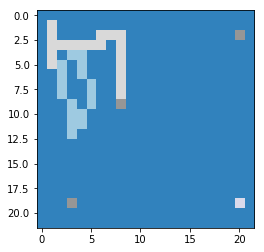

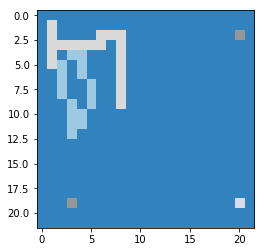

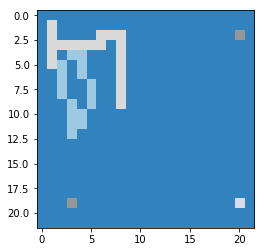

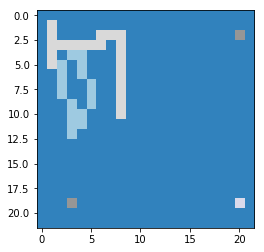

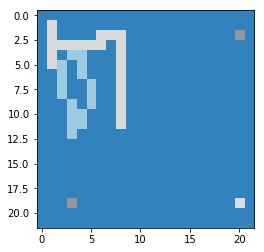

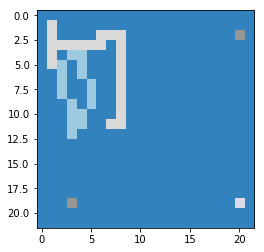

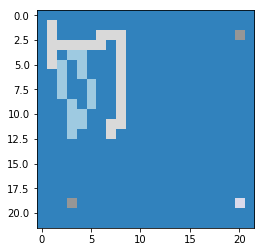

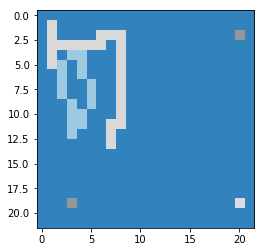

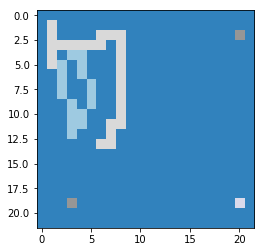

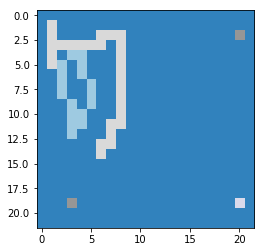

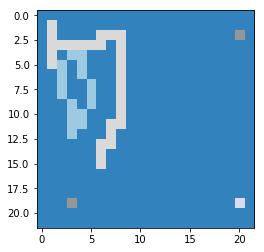

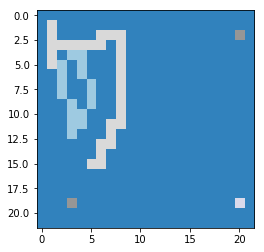

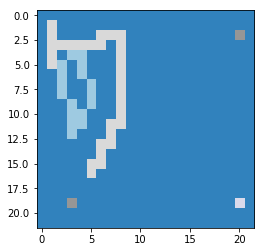

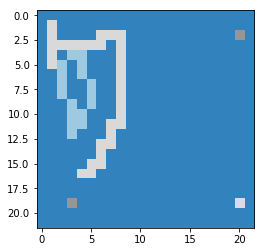

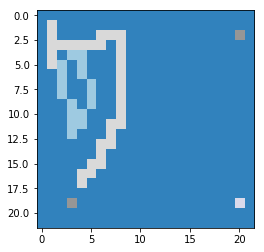

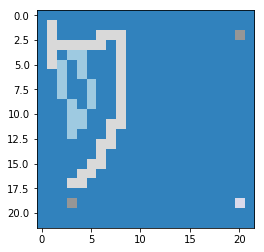

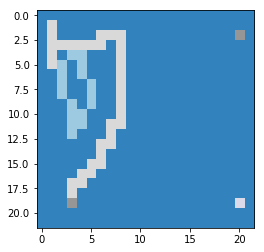

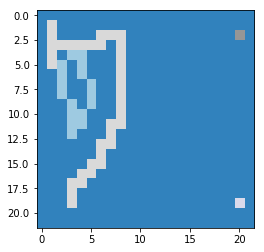

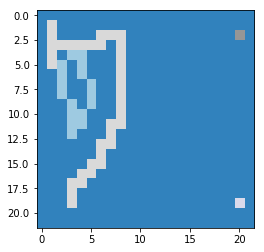

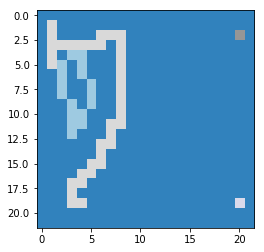

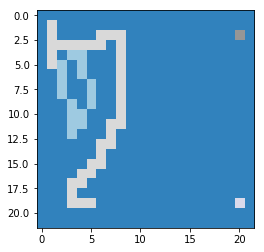

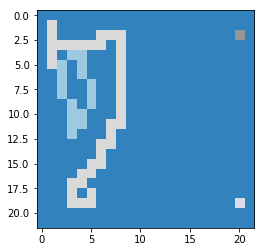

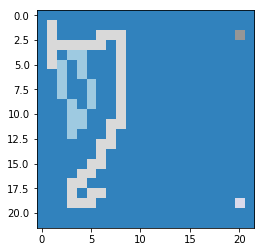

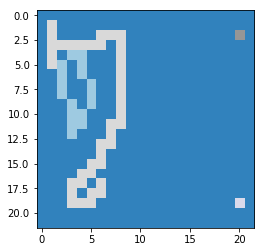

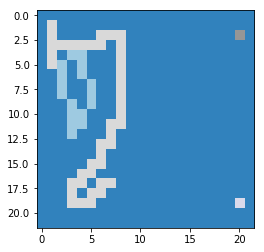

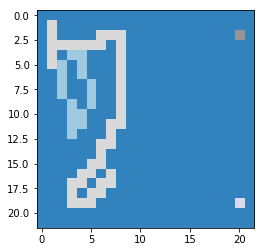

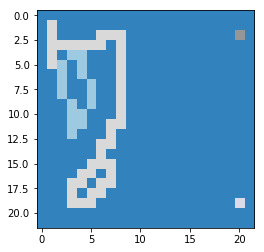

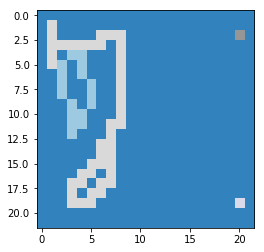

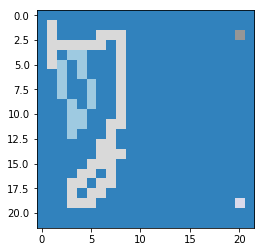

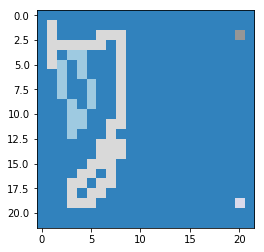

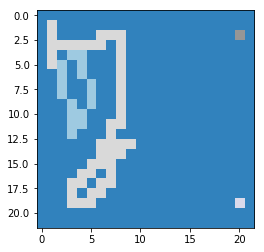

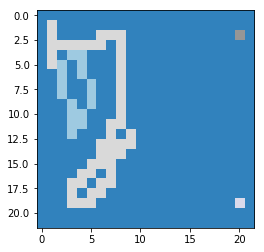

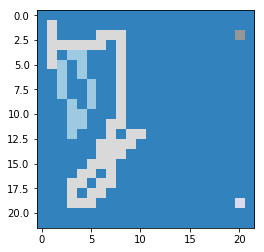

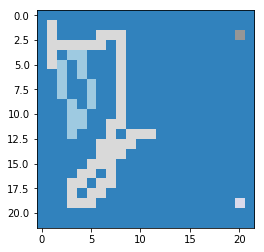

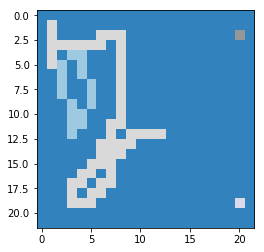

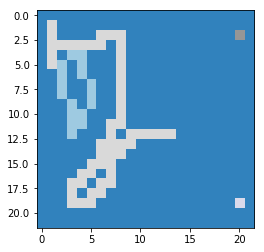

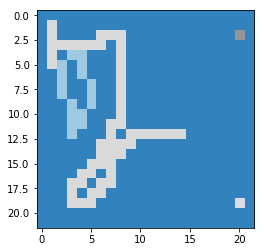

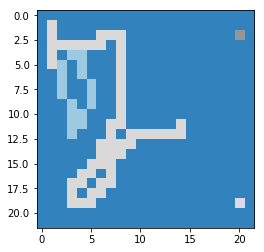

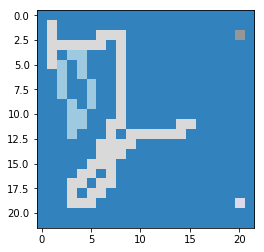

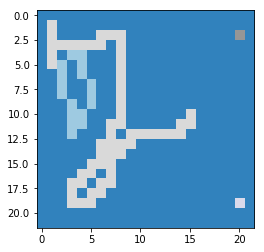

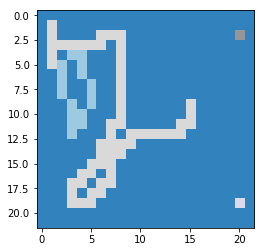

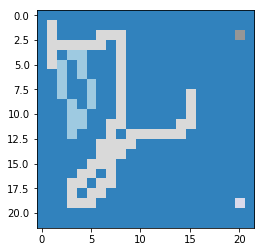

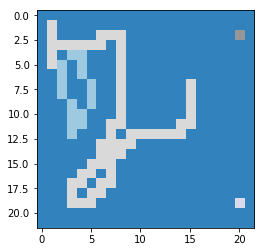

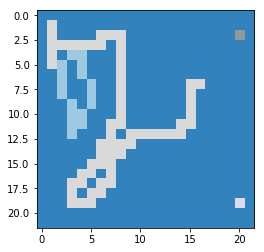

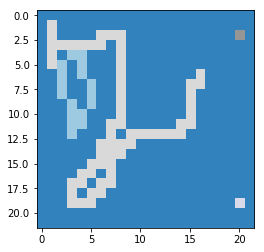

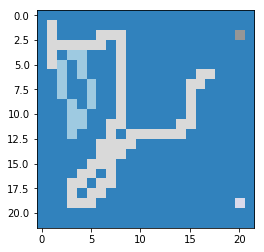

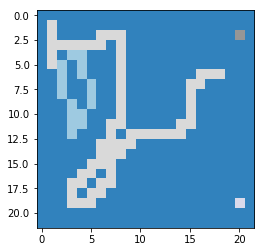

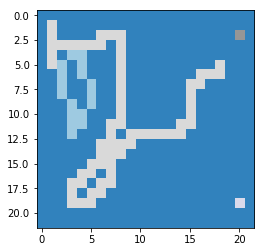

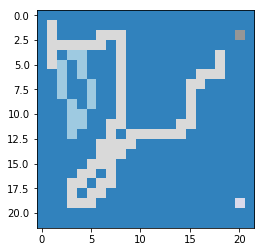

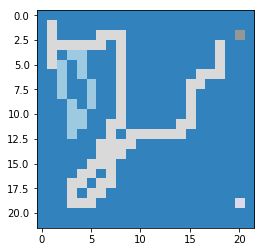

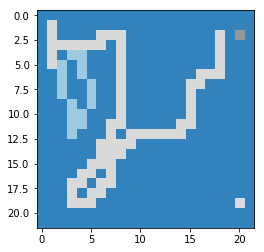

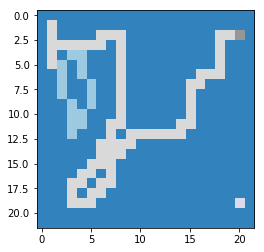

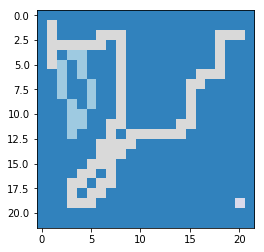

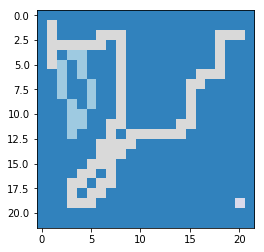

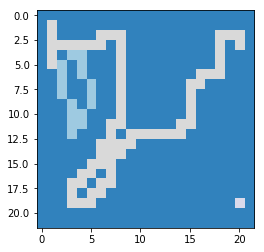

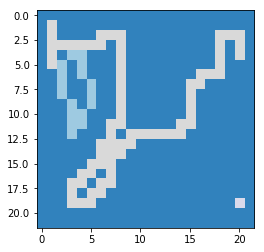

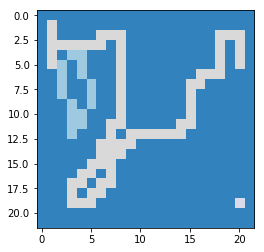

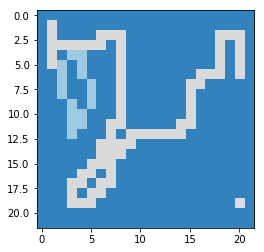

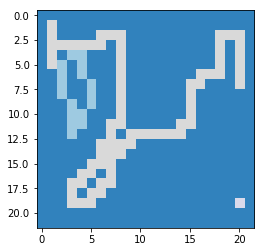

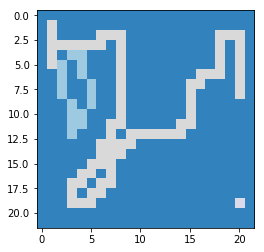

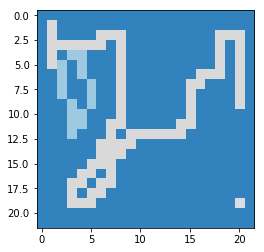

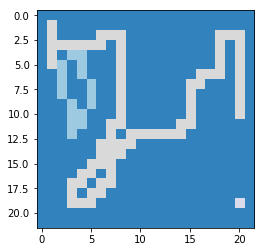

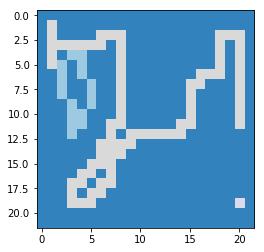

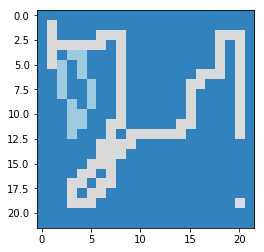

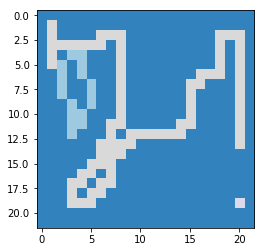

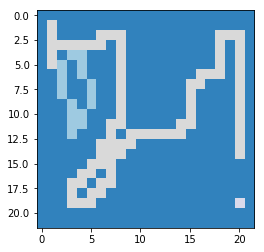

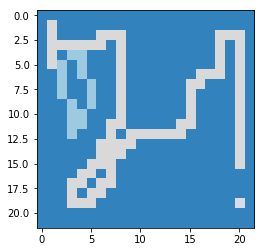

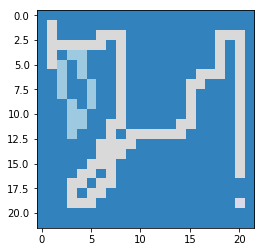

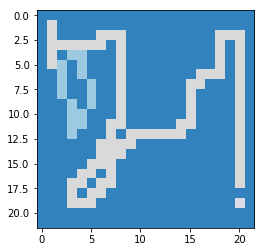

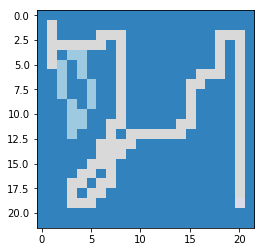

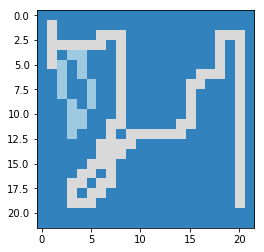

In [11]:
fig = plt.figure()
fig.canvas.draw()
PATH_VALUE = 9

matrix[start] = 7
matrix[goal] = 7
for p in list_point:
    matrix[p] = 8
    
if final_path:
    print("Found path")
    for pos in final_path:
        if matrix[pos] != PATH_VALUE:
            matrix[pos] = PATH_VALUE
        plt.imshow(matrix, cmap="tab20c")
        fig.canvas.draw()
        plt.pause(0.5)
        plt.show()
else:
    print("Not found path")
    

**Use_heapq = False**

In [ ]:
from path_finder import AllPointSearch
all_point_finder = AllPointSearch(start, goal, list_point, use_heapq=False, algo_to_find_shortest_point=AStarSearch)

In [ ]:
all_point_finder._init_path_lookup(matrix)
all_point_finder.path_lookup[start][list_point[-1]]

**Permutation function**
Time complex: O(n!)

In [ ]:
res = []
def permutation(raw_list, prefix_list):
    if len(raw_list) == 0:
        res.append(prefix_list)
        return
    for i in range(len(raw_list)):
        post_list = raw_list[:i] + raw_list[i+1:]
        permutation(post_list, prefix_list + [raw_list[i]])

In [ ]:
pref_list = []
A = ['a', 'b', 'c', 'd', 'e', 'f']
permutation(A, pref_list)

In [ ]:
res

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 1), (4, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (2, 6), (2, 7), (2, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (9, 8), (9, 7), (9, 6), (10, 6), (11, 6), (12, 6), (13, 6), (14, 6), (14, 5), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (18, 3), (19, 3), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (18, 7), (17, 7), (16, 7), (16, 8), (16, 9), (15, 9), (15, 10), (15, 11), (14, 11), (13, 11), (12, 11), (11, 11), (10, 11), (9, 11), (8, 11), (7, 11), (6, 11), (6, 12), (6, 13), (6, 14), (5, 14), (4, 14), (4, 15), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (2, 19), (2, 20), (2, 20), (3, 20), (4, 20), (5, 20), (6, 20), (7, 20), (8, 20), (9, 20), (10, 20), (11, 20), (12, 20), (13, 20), (14, 20), (15, 20), (16, 20), (17, 20), (18, 20), (19, 20)]
